

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>

## Vendas de videogames no mundo 2016
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

## Introdução

## Carregando os dados

In [1]:
# importandando bibliotecas:

import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt

In [2]:
# lendo os dados:

df_game = pd.read_csv('/datasets/games.csv')

#df_game = pd.read_csv('/datasets/games.csv', keep_default_na=False)

In [3]:
# descrevendo funções:

# ///////////////////////////// DESCRIÇÃO DA FUNÇÃO VERIFICAÇÃO DE NOMES DAS COLUNAS //////////////////////////////////////////

def cabeçalhos_df(df):
    coluna_nova = []
    for aux_col in df.columns:
        sem_espaços = aux_col.strip()
        minuscula = sem_espaços.lower()
        underline = minuscula.replace(' ','_')
        coluna_nova.append(underline)
    df.columns = coluna_nova
    return df

# /////////////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE DATAFRAME EXPLÍCITOS //////////////////////////////////////////////////

def df_duplicado(df):                                                         
    aux_df_duplicado = df[df.duplicated()]
    tam_df_duplicado = df.duplicated().sum()
    if tam_df_duplicado > 0:
        return print(f"{aux_df_duplicado}, Quantidade de duplicados explicitos na tabela é = {tam_df_duplicado}")
       
    else:
        return print(f"Quantidade de duplicados explicitos na tabela é = {tam_df_duplicado}")

# ////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE SERIES EXPLÍCITOS //////////////////////////////////////////////////////////////

def serie_duplicado(column, df = df_game):
    aux_serie_duplicado = df[column].value_counts()
    mascara = aux_serie_duplicado > 1
    duplicado = aux_serie_duplicado.index[mascara]
    return print(duplicado)
    #if len(duplicado) > 1:
    #    return print(f"{duplicado}, Quantidade de valores duplicados implicitos na culuna {column} é = {len(duplicado)}")
    #else:
    #    return print(f"Quantidade de valores duplicados implicitos na culuna {column} é = {len(duplicado)}")
    
# ////////// DESCRIÇÃO DA FUNÇÃO QUE FILTRA OS VALORES FALTANTES EM UMA COLUNA ////////////////////////////////////////////////
    
def filtrar_nan_coluna(column, df = df_game):
    mascara = df[column].isna()
    df_filtrado = df[mascara]
    return df_filtrado

# ////////// DESCRIÇÃO DA FUNÇÃO QUE TIRA ESPAÇOS E CONVERTE A DESCRIÇÃO EM NINUSCULAS ////////////////////////////////////////

def serie_minuscula(coluna, df = df_game):
    df[coluna] = df[coluna].str.strip()
    df[coluna] = df[coluna].str.lower()
    return df

#/////////// DESCRIÇÃO DA FUNÇÃO SUBSTITUIR VALORES AUSENTES EM UMA COLUMA ///////////////////////////////////////////////////  
    
def substituir_nan_coluna (column,valor, df = df_game):
    for col in column:
        df[col].fillna(valor, inplace=True)
    return df

#/////////// DESCRIÇÃO DA FUNÇÃO CALCULA AS VENDAS DE TODAS AS REGIÓES ///////////////////////////////////////////////////////  

def vendas_regioes(row):
    na = row['na_sales']
    eu = row['eu_sales']
    jp = row['jp_sales']
    other = row['other_sales']
    total_sales = na + eu + jp + other
    return total_sales

# ////////////////////////////////////// MODIFICAR CABEÇALHOS DAS COLUNAS ///////////////////////////////////////////////////

def modificar_cabeçalhos_df (df, indice, renome): #num_col, renome
    colunas = list(df.columns)
    colunas.pop(indice-1)
    colunas.insert(indice-1,renome)
    df.columns = colunas
    return df

# /////////////////////////// FILTRAR DATAFRAMA POR PLATAFORMA - ANO E VENDAS TOTAIS  /////////////////////////////////////////

def categoria_ano(df, categoria, plataforma = 'platform', ano = 'year_of_release', vendas='total_sales' ):
    df_aux = df[df[plataforma]==categoria]
    aux = df_aux.groupby(ano)[vendas].sum().reset_index()
    aux.drop((len(aux)-1), inplace=True)
    return aux

# ///// FILTRA UMA COLUNA POR CATEGORIAS E RETORNA ESSAS CATEGORIAS COMO COLUNAS DE UM NOVO DATAFRAME COM OS VALORES DE UMA 
# ///// COLUNA FIXA, AS COLUNAS SÃO ORDENADAS ALFABETICAMENTE /////////////////////////////////////////////////////////////////

def concat_coluna(df, coluna, col_fixa = 'total_sales'):
    data = pd.DataFrame()
    lista = list(df[coluna].unique())
    for tab in lista:
        aux = df[df[coluna]==tab]
        aux = aux.loc[:,[col_fixa]]
        modificar_cabeçalhos_df (aux, 1, tab)
        data = pd.concat([data, aux], ignore_index=True, sort=True)       
    return data

# ////// REMOVE TODOS OS OUTLIER DE UM DATAFRAME C=1.5, TODAS AS COLUNAS DEVEM SER VALORES NUMERICOS FLOAT OU INTEIRO ////////

def analisar_outlier_df(df, c=1.5):
    data = pd.DataFrame()
    lista = list(df.columns.unique())
    for l in lista:
        q1 = df[l].quantile(0.25)
        q3 = df[l].quantile(0.75)
        iqr = q3 - q1
        li = q1 - (c*iqr)
        ls = q3 + (c*iqr)
        aux = df[(df[l]>=li)&(df[l]<=ls)]
        aux = aux.loc[:,[l]]
        data = pd.concat([data, aux], axis=1, ignore_index=True, sort=True)
    data.columns = lista
    return data

#///// REALIZA 2 GRAFICOS DE DISPERSÃO E CALCULA A CORRELAÇÃO ENTRE 2 VARIAVEIS COM RESPEITO DE UMA //////////////////////////

def correlacao_vendas_vs_criticos(plataforma,df=df_game, col='platform', usuario='user_score', critico='critic_score'):
    df_aux = df[df[col]==plataforma]
    df_aux[critico].mask(df[critico]=='unknown',0, inplace = True)
    df_aux[usuario].mask(df[usuario]=='unknown',0, inplace = True)
    df_aux[usuario].mask(df[usuario]=='tbd',0, inplace = True)
    
    df_aux[critico] = df_aux[critico].astype(float)
    df_aux[usuario] = df_aux[usuario].astype(float)
    
    df_aux.plot(x=critico, y='total_sales',kind='scatter', color='blue',
            title=(f'Dispersão entre críticas profissionais e vendas totais\n Plataforma: {plataforma}'))
    
    df_aux.plot(x=usuario, y='total_sales',kind='scatter', color='red',
            title=(f'Dispersão entre avaliações de usuários e vendas totais\n Plataforma: {plataforma}'))
    
    plt.show()
    
    print(f"Coeficiente de correlação entre pontuação_do_usuário e vendas :{df_aux[usuario].corr(df_aux['total_sales'])}")
    print(f"Coeficiente de correlação entre pontuação_crítica e vendas : {df_aux['critic_score'].corr(df_aux['total_sales'])}")
    return

#///// CONVERTE TODAS AS LINHAS EM COLUNAS E ATRIBUIR OS NOMES ANTIGOS DAS COLUNAS AOS ÍNDICES ////////////////////////////////

def trocar_colunas_linhas(df):
    dic = {}
    coluna = list(df.index)
    indice = list(df.columns)
    i = 0
    for x in coluna:
        valores = list(df.iloc[i,:])
        dic[x]=valores
        i +=1
    df_aux=pd.DataFrame(dic, index = indice)
    return df_aux

#////////////////// DESCRIÇÃO DA FUNÇÃO CALCULA MEDIA E VARIANÇA DE UMA COLUNA NÚMERICA (df, col, plan) ////////////////////////////////  

def media__variança_coluna(df,col,plan):
    media = df[col].mean()
    mediana = df[col].median()
    var   = df[col].var()
    desv  = mt.sqrt(var)
    plano = plan
    return print(f"\nVARIÁVEIS ESTATÍSTICAS DESCRITIVAS: {plano} /////////////////////////////////////\n Meia estatística: {media}\n Mediana estatística: {mediana} \n Variança estatística: {var}\n Desviação padrão: {desv}")



### Descrevendo os dados

In [4]:
# descrevendo os dados:

df_game.info()
df_game.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [5]:
# imprimindo uma amostra:

df_game.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2707,True Crime: New York City,PS2,2005.0,Action,0.57,0.02,0.07,0.09,NaN,NaN,NaN
15768,Pulse Racer,XB,2003.0,Racing,0.01,0.00,0.00,0.00,24.0,2.8,E
10587,Help Wanted: 50 Wacky Jobs,Wii,2008.0,Simulation,0.06,0.03,0.00,0.01,65.0,7,E10+
6064,Psi-Ops: The Mindgate Conspiracy,PS2,2004.0,Shooter,0.14,0.11,0.00,0.04,84.0,8.9,M
1831,Persona 4: Golden,PSV,2012.0,Role-Playing,0.36,0.23,0.38,0.15,93.0,9.2,M
6883,XS Airboat Racing,PS,2002.0,Racing,0.13,0.09,0.00,0.02,NaN,NaN,NaN
3885,Spectrobes: Beyond the Portals,DS,2008.0,Role-Playing,0.36,0.11,0.00,0.04,70.0,7.7,E10+
5479,Super Power League 2,SNES,1994.0,Sports,0.00,0.00,0.33,0.00,NaN,NaN,NaN
1205,Spider-Man 2: Enter: Electro,PS,2001.0,Action,0.57,0.87,0.02,0.09,74.0,8.7,E
201,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


### Preparação dos dados

#### Corrigindo nomes de colunas

In [6]:
# Corrigimos os nomes das colunas de acordo com as boas práticas:

print(list(df_game.columns))
cabeçalhos_df(df_game)
print()
print('//////////////////////////////////// <<< Nomes de colunas corrigidos >>> /////////////////////////////////////////////')
print()
print(list(df_game.columns))

['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']

//////////////////////////////////// <<< Nomes de colunas corrigidos >>> /////////////////////////////////////////////

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


#### Verificando duplicados explicitos na tabela

In [7]:
df_duplicado(df_game)

Quantidade de duplicados explicitos na tabela é = 0


#### Preparação dos dados: tipos de dados, duplicados, valores faltantes de cada coluna

##### Coluna: 'name'

In [8]:
# Verificando duplicados da coluna

serie_minuscula('name')
serie_duplicado('name')
print()
filtrar_nan_coluna('name')


Index(['need for speed: most wanted', 'lego marvel super heroes', 'fifa 14',
       'madden nfl 07', 'ratatouille', 'cars',
       'lego star wars ii: the original trilogy', 'madden nfl 08',
       'lego batman 3: beyond gotham', 'monopoly',
       ...
       'dead to rights: retribution', 'rugrats: royal ransom', 'glover',
       'icarly 2: ijoin the click!', '18 wheeler: american pro trucker',
       'world championship pool 2004', 'super bubble pop',
       'saw ii: flesh & blood', 'fallout: brotherhood of steel',
       'my horse & me'],
      dtype='object', length=2805)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Valores faltantes 

substituir_nan_coluna(['name'],'unknown')
df_game[df_game['name']=='unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Por não sabermos o nome do jogo colocamos o nome: 'unknown' (desconhecido) e mantemos o valor na tabela pois sua venda foi registrada na receita da região correspondente. 

A causa da não posse da informação é o principal motivo a investigar, acompanhando a cadeia de transferência da informação e determinando se a ausência foi de origem ou está ligada ao processamento durante a consolidação da informação.

##### Coluna: 'platform'

In [10]:
df_game['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Não possui valores faltantes e a descrição categórica está correta, portanto não precisa processar mais informações na coluna.

##### Coluna: 'year_of_release'

In [11]:
# Valores faltantes da coluna 

substituir_nan_coluna(['year_of_release'],0)
df_game['year_of_release'] = df_game['year_of_release'].astype(int)
df_game['year_of_release'] = df_game['year_of_release'].replace({0:'unknown'})
df_game['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 'unknown',
       1995, 1991, 1981, 1987, 1980, 1983], dtype=object)

Passamos os valores das colunas de float para int para retirar o decimal e depois colocamos a palavra: 'unknown' nos valores faltantes para poder identificá-los não podemos estimar os valores com as informações recebidas.

##### Coluna: 'genre'

In [12]:
# Valores faltantes

serie_minuscula('genre')
filtrar_nan_coluna('genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
substituir_nan_coluna(['genre'],'unknown')
df_game['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', 'unknown'], dtype=object)

##### Coluna: 'na_sales'

In [14]:
# Valores faltantes

print(f"Quantidade de celulas com vendas = 0 são: {len(df_game[df_game['na_sales']==0])}")
na_sales =len(filtrar_nan_coluna('na_sales'))
if na_sales == 0:
    print(f"Quantidade de celulas com valores faltantes = {len(filtrar_nan_coluna('na_sales'))}")
else:
    na_sales

Quantidade de celulas com vendas = 0 são: 4508
Quantidade de celulas com valores faltantes = 0


##### Coluna: 'eu_sales'

In [15]:
# Valores faltantes

print(f"Quantidade de celulas com vendas = 0 são: {len(df_game[df_game['eu_sales']==0])}")
eu_sales =len(filtrar_nan_coluna('eu_sales'))
if eu_sales == 0:
    print(f"Quantidade de celulas com valores faltantes = {len(filtrar_nan_coluna('eu_sales'))}")
else:
    eu_sales

Quantidade de celulas com vendas = 0 são: 5870
Quantidade de celulas com valores faltantes = 0


##### Coluna: 'jp_sales'

In [16]:
# Valores faltantes

print(f"Quantidade de celulas com vendas = 0 são: {len(df_game[df_game['jp_sales']==0])}")
jp_sales =len(filtrar_nan_coluna('jp_sales'))
if jp_sales == 0:
    print(f"Quantidade de celulas com valores faltantes = {len(filtrar_nan_coluna('jp_sales'))}")
else:
    jp_sales

Quantidade de celulas com vendas = 0 são: 10514
Quantidade de celulas com valores faltantes = 0


##### Coluna: 'other_sales'

In [17]:
# Valores faltantes

print(f"Quantidade de celulas com vendas = 0 são: {len(df_game[df_game['other_sales']==0])}")
other_sales =len(filtrar_nan_coluna('other_sales'))
if other_sales == 0:
    print(f"Quantidade de celulas com valores faltantes = {len(filtrar_nan_coluna('other_sales'))}")
else:
    other_sales

Quantidade de celulas com vendas = 0 são: 6601
Quantidade de celulas com valores faltantes = 0


##### Coluna: 'critic_score'

In [18]:
# Valores faltantes

substituir_nan_coluna(['critic_score'],0)
df_game['critic_score'] = df_game['critic_score'].astype(int)
df_game['critic_score'] = df_game['critic_score'].replace({0:'unknown'})
df_game['critic_score'].unique()

array([76, 'unknown', 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94,
       93, 85, 86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67,
       81, 66, 56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48,
       57, 29, 47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40,
       46, 39, 34, 35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13],
      dtype=object)

Como não estão descritas as causas da falta de dados correspondentes à avaliação crítica, vamos atribuir o valor: 'desconhecido' Se precisarmos realizar operações matemáticas no futuro, basta filtrar a tabela e converter de string para valores numéricos.

##### Coluna: 'user_score'

In [19]:
# valores faltantes

filtrar_nan_coluna('user_score')
df_game['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd:Essa abreviação indica que algo ainda não foi informado ou não tem definição prévia para acontecer "**a ser anunciado**". Portanto não podemos assumir que os valores são desconhecidos, por isso vou deixar essa categoria igual enquanto aguardo a atualização do banco de dados, para os valores faltantes vamos substituí-la por: 'unknown' porque não conhecemos as causas da ausência de dados.

In [20]:
substituir_nan_coluna(['user_score'],'unknown')
df_game['user_score'].unique()

array(['8', 'unknown', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3',
       '7.4', '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8',
       '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3',
       '4.3', '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4',
       '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2',
       '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Portanto, se precisarmos realizar cálculos matemáticos no futuro, temos 2 palavras-chave para podermos filtrar: 'tbd' e 'unknown' para fornecer um valor numérico nulo, como 0 (zero) ou filtrar e converter os valores de string resultantes para valores numéricos: float ou inteiro conforme necessário

##### Coluna: 'rating'

In [21]:
# valores faltantes

print(df_game['rating'].unique())
filtrar_nan_coluna('rating')
substituir_nan_coluna(['rating'],'unknown')
print()
print(df_game['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


#### Totalização das vendas de todas as regiões

In [22]:
df_game['total_sales'] = df_game.apply(vendas_regioes, axis=1)

df_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,unknown,unknown,unknown,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,unknown,unknown,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,unknown,unknown,unknown,0.01
16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,unknown,unknown,unknown,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,unknown,unknown,unknown,0.01
16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,unknown,unknown,unknown,0.01


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Total de vendas calculado!
</div>


#### Conclusões da preparação dos dados

Quando trabalhamos em um projeto é importante entender que conceituação, planejamento, organização, execução, revisão, melhorias contínuas, auditorias são estruturadas em fases do projeto e cada fase possui objetivos específicos que estão sempre alinhados com os objetivos principais do projeto.

Nesse sentido, devemos entender que em cada fase do projeto múltiplas tarefas são realizadas em paralelo ou em série (numa sequência dependente de atividades) para que interajam vários profissionais ou equipes de profissionais que recebem e processam informações e as enviam para outros, portanto que determinar as causas imediatas e raízes pode mostrar alguns(s) procedimentos que devem ser ajustados na execução das fases do projeto porque os fatores internos e/ou externos que estão gerando que, conseqüentemente, temos valores ausentes em nossas tabelas de registro não sendo detectado.

É possível que as causas dos valores faltantes de origem externa à organização sejam mais difíceis de detectar e os procedimentos que os causam, principalmente se fizerem parte de outra empresa, mas permite-nos criar os mecanismos e procedimentos que nós devemos ter em conta a ser executado quando essas anomalias forem detectadas.

Caso os valores faltantes sejam gerados dentro de nossa organização, seja fora ou dentro do projeto, é um pouco “mais fácil” executar os procedimentos de investigação de causa para especificar suas origens e auditar tecnicamente para ajustar e evitar ou prevenir a geração de valores ausentes.

Para finalizar, os valores faltantes presentes nas informações quase que por defeito devem consequentemente gerar uma investigação de causas e inconsistências de informações para estabelecer problemas na cadeia produtiva que precisam ser auditados para serem melhorados. É possível que em 90% dos casos sejam problemas associados ao Sistema de Gestão da empresa, que pode ser inadequado, deficiente ou inexistente.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
    
Você identificou os principais problemas dos dfs e os tratou a contento. Temos uma meterial bem robusto para as próximas etapas.
</div>


## Análise dos dados

### Análise dos dados

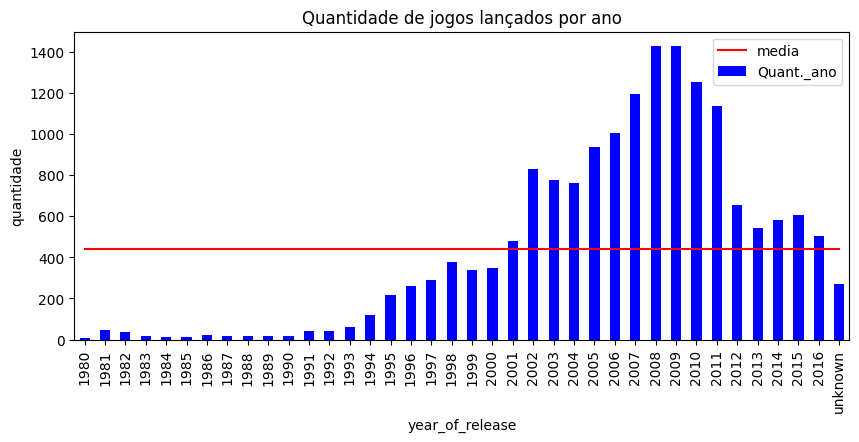

In [23]:
# Quantidade de jogos lançados em diferentes anos

jogos_ano = df_game.groupby('year_of_release')['name'].count().reset_index()
modificar_cabeçalhos_df (jogos_ano, 2, 'quantidade')
jogos_ano['media'] = jogos_ano['quantidade'].mean()
lista = list(jogos_ano['year_of_release'])
jogos_ano.index = lista

jogos_ano['quantidade'].plot(kind='bar', color='blue', figsize=(10, 4))
jogos_ano['media'].plot(color='red')

plt.xticks(rotation=90)
plt.xlabel('year_of_release')
plt.ylabel('quantidade')
plt.legend(['media','Quant._ano'])
plt.title('Quantidade de jogos lançados por ano')

plt.show()

Como podemos observar, o intervalo de 2002 a 2012 é o período de maiores vendas, sendo os anos de 2008 a 2009 os anos de pico.

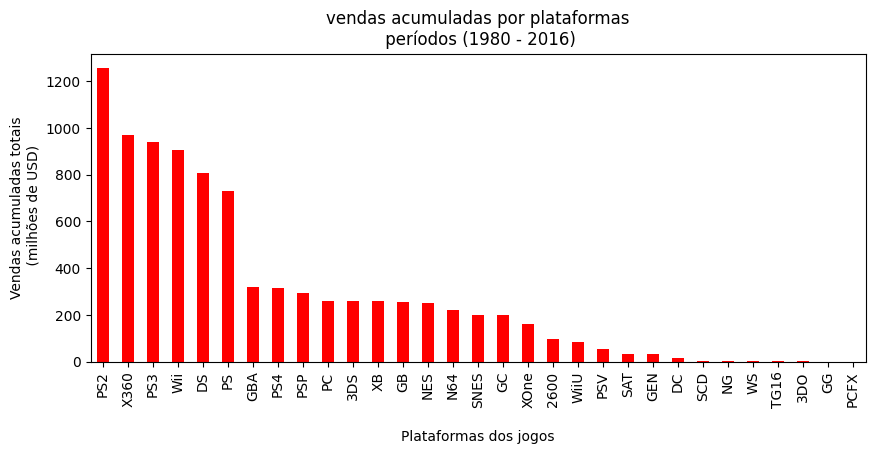

In [24]:
# Vendas por plataformas

plat_vend = df_game.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales',ascending=False)
lista = list(plat_vend['platform'])
plat_vend.index = lista

plat_vend['total_sales'].plot(kind='bar', color='red', figsize=(10, 4))
plt.xticks(rotation=90)
plt.xlabel('\nPlataformas dos jogos')
plt.ylabel('Vendas acumuladas totais\n (milhões de USD)')
plt.title('vendas acumuladas por plataformas\n períodos (1980 - 2016)')

plt.show()

Como podemos observar, as 3 plataformas com maiores vendas acumuladas no período indicado no gráfico são:
1) PS2
2) X360
3) PS3
4) Wii
5) DS


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Releases anuais e vendas investigados com sucesso!
</div>


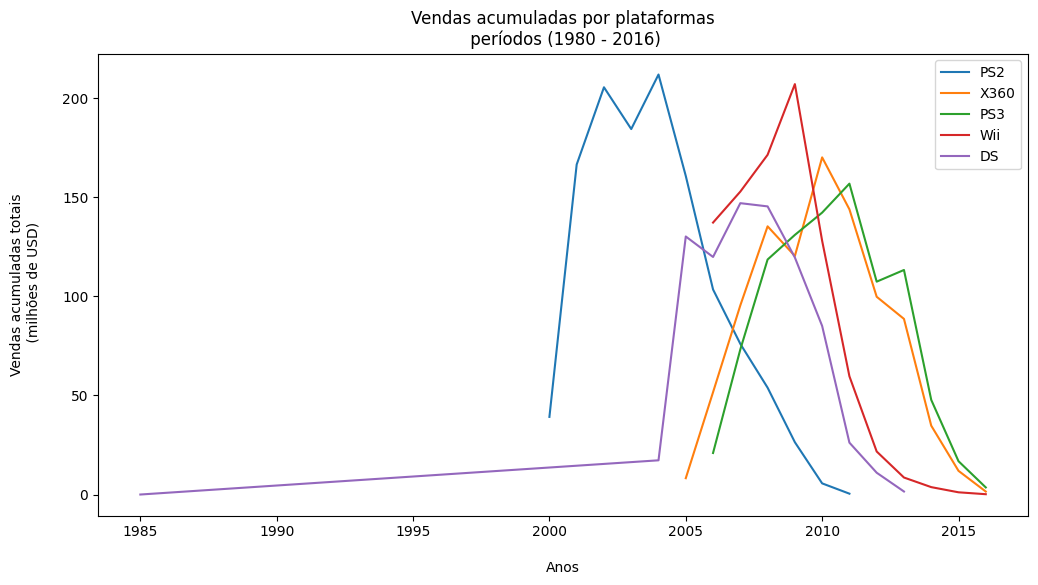

In [25]:
# plataformas com as maiores vendas totais para cada ano

top_plat = list(plat_vend['platform'].head(6))
df_top_vend = df_game[df_game['platform'].isin(top_plat)]

PS2 = categoria_ano(df_top_vend, 'PS2')
x1 = list(PS2['year_of_release'])
y1 = list(PS2['total_sales'])

X360 = categoria_ano(df_top_vend, 'X360')
x2 = list(X360['year_of_release'])
y2 = list(X360['total_sales'])

PS3 = categoria_ano(df_top_vend, 'PS3')
x3 = list(PS3['year_of_release'])
y3 = list(PS3['total_sales'])

Wii = categoria_ano(df_top_vend, 'Wii')
x4 = list(Wii['year_of_release'])
y4 = list(Wii['total_sales'])

DS = categoria_ano(df_top_vend, 'DS')
x5 = list(DS['year_of_release'])
y5 = list(DS['total_sales'])

plt.figure(figsize=(12, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

plt.xticks(rotation=0)
plt.legend(top_plat)
plt.xlabel('\nAnos')
plt.ylabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.title('Vendas acumuladas por plataformas\n períodos (1980 - 2016)')
plt.show()

É importante notar que partimos da premissa de descartar valores “desconhecidos”. Podemos ver as 5 plataformas com maiores vendas e os seus períodos iniciais no mercado, como evoluíram até que as suas vendas diminuíram quer devido ao lançamento de plataformas mais recentes ou de jogos interactivos semelhantes colocados no mercado por plataformas de nova geração.

Podemos observar graficamente para as 5 plataformas, podemos deduzir que o ciclo de vida de acordo com a amplitude da curva de vendas tem em média uma duração de 10 anos desde o seu aparecimento no mercado até à sua saída.

Por exemplo, se analisarmos o PS2 e o PS3, que são 2 gerações de plataformas da mesma marca SONY, podemos observar que o PS2 surge por volta de 2000 e encerra seu ciclo entre 2011 e a transição da nova geração PS3 começa em 2006 até 2016, ou seja, uma plataforma leva aproximadamente 6 anos para lançar a nova geração, e nos próximos 4 anos as duas plataformas coexistem, até que termine a vida útil do ponto de vista da demanda dos usuários da geração mais antiga.

In [26]:
# filtrando dados para anos maiores que 2000

df_2000 = df_game[~df_game['year_of_release'].isin(['unknown'])]
df_2000['year_of_release'] = df_2000['year_of_release'].astype(int)
df_2000 = df_2000[df_2000['year_of_release']>=2013]


/tmp/ipykernel_97/1242627367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['year_of_release'] = df_2000['year_of_release'].astype(int)


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Sugiro que revisitemos a decisão de usar os dados a partir do ano 2000. Pensando em prever o comportamento em 2017, me parece que temos poucas plataformas em 2000 que conversam com o cenário em 2017. O que acha?
    
A próxima questão referente ao comportamento das vendas por plataforma será bem impactada pelo ajuste do período, revisarem então na próxima iteração.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>
Pensei em observar o comportamento de todo o ciclo de vida da plataforma mas certamente fazer uma previsão para o próximo ano: 2017. Acho que com dois anos históricos de informação é suficiente para fazer a previsão para o próximo ano.
    
A verdade é que não baseei os meus critérios pensando em construir um modelo de previsão futura, queria apenas observar o comportamento e o ciclo de vida das plataformas até 2016 e aqui está o erro desde meu ponto de vista.

Para estabelecer um modelo mais científico de previsão podemos rever os diferentes métodos de projeção:
    
• Médias, médias móveis, médias ponderadas\
• Regressão de mínimos quadrados\
• Projeção por fator de crescimento\
• Projeção de temporalidade\
• Entre outros
    
Resumindo, a construção de um modelo dependerá das características específicas que serão avaliadas, tanto internas quanto externas. Ao criar o modelo, ele será projetado ou simulado para as condições em que será executado (nosso caso 2017), ou seja. , o modelo será simulado em conjunto com todo o seu contexto projetado (entradas e saídas), objetivos para o ano de 2017 em todas as áreas da empresa.
</div>


<div class="alert alert-warning">
<strong>Comentário do revisor v2</strong>

Compreendo seu ponto de vista.
    
Ainda assim focaria a análise em períodos mais homogêneos ao momento que estamos visando prever... Particularmente utilizaria dados a partir de 2007. Mas respeito seu ponto de vista e aprovarei o seu projeto!
</div>



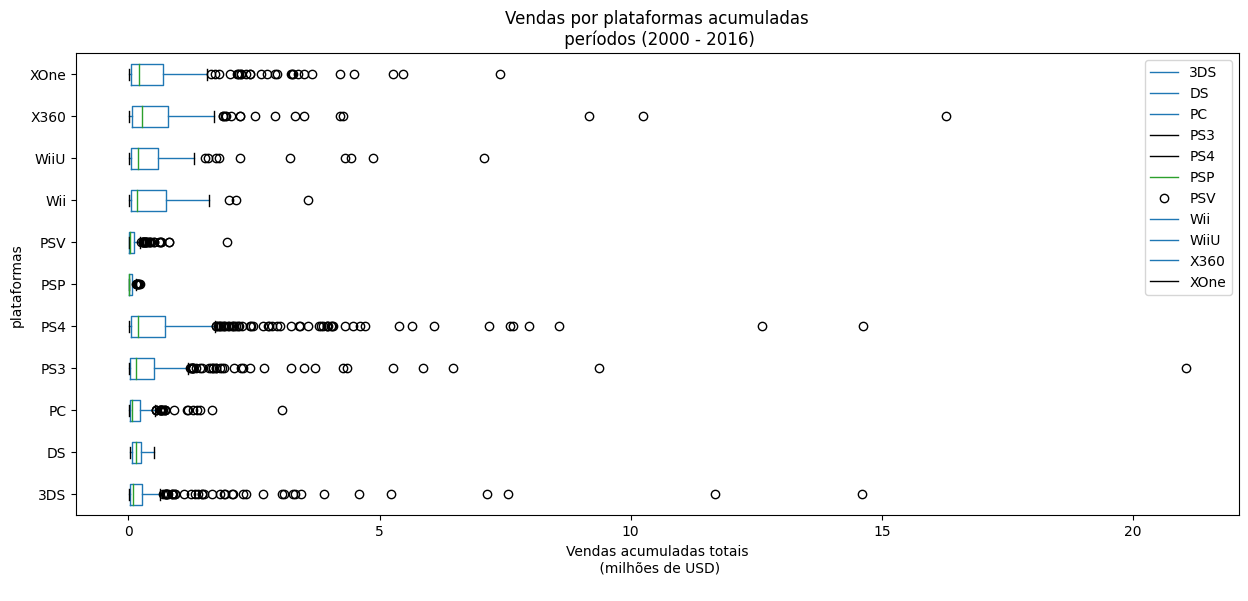

In [27]:
# Vendas globais de todos os jogos, divididos por plataforma. 

plataforma = concat_coluna(df_2000, 'platform')

coluna=list(plataforma.columns)

plataforma.plot(kind='box', vert = False, figsize=(15, 6))
plt.legend(coluna)
plt.xlabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.ylabel('plataformas')
plt.title('Vendas por plataformas acumuladas\n períodos (2000 - 2016)')
plt.show()

Podemos perceber que temos muitos valores fora dos limites inferior e superior (outliers) podemos simplesmente retirar os valores, é sempre importante analisar se as variáveis analisadas possuem relacionamento dentro ou fora da tabela que estamos processando e determinar os impactos e consequências da sua remoção, no nosso caso vamos remover para fins ilustrativos. 

É importante considerar que ao alterar a tabela, os valores estatísticos descritivos dos valores contidos em cada variável poderão ser alterados, portanto é necessário analisar se os valores que serão retirados não alteram significativamente o objetivo do estudo realizado. Neste caso, devemos avaliar a melhor estratégia para que o resultado do processamento dos dados atenda a um critério ou metodologia científica comprovada.

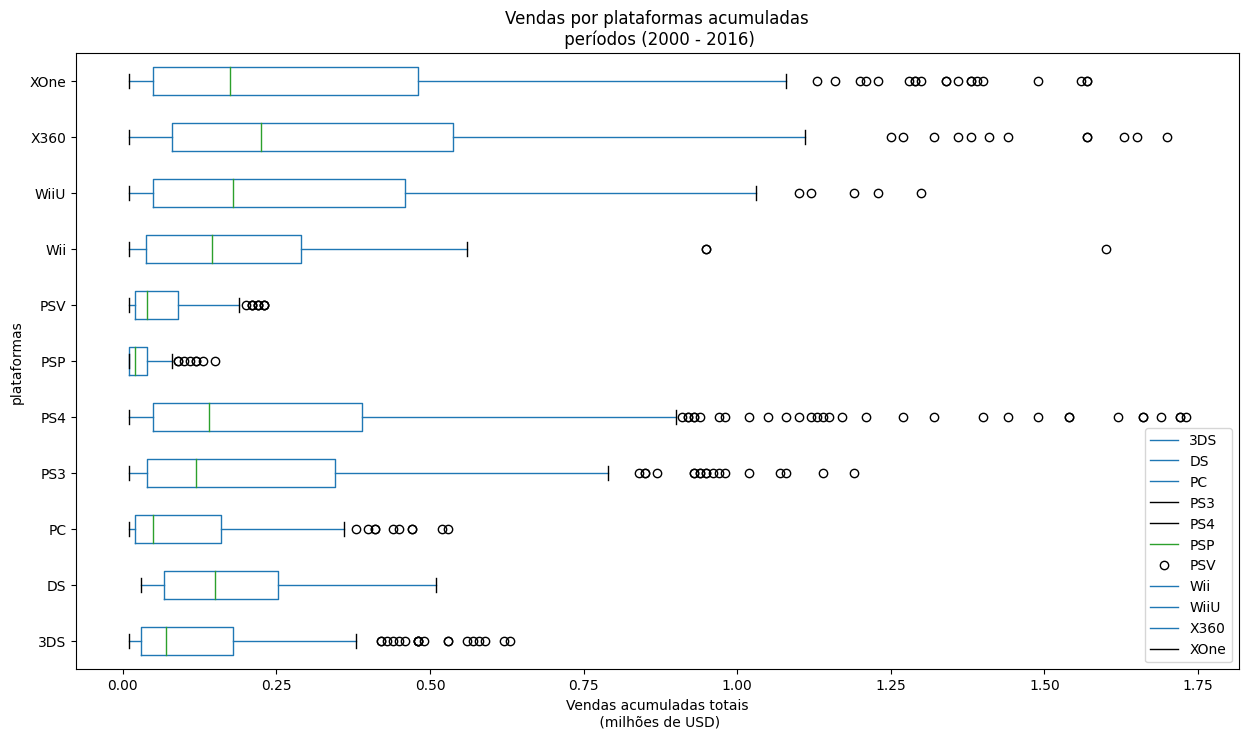

In [28]:
# Vendas globais de todos os jogos, divididos por plataforma. outliers removidos 

plataforma_outliers = analisar_outlier_df(plataforma)

coluna=list(plataforma_outliers.columns)

plataforma_outliers.plot(kind='box', vert = False, figsize=(15, 8))
plt.legend(coluna)
plt.xlabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.ylabel('plataformas')
plt.title('Vendas por plataformas acumuladas\n períodos (2000 - 2016)')
plt.show()


Podemos ver que las vendas de casi todas las plataformas tenian valores medianos entorno al 0.2 - 0.25 millones de USD, el valor mas significativo son las vendas para la plataforma GB entorno al 0.7 millones. 


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Comparativos entre plataformas foram apresentados de forma clara utilizando boxplots.
</div>



/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(
/tmp/ipykernel_97/3770906316.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[critico] = df_aux[critico].astype(float)
/tmp/ipykernel_97/3770906316.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

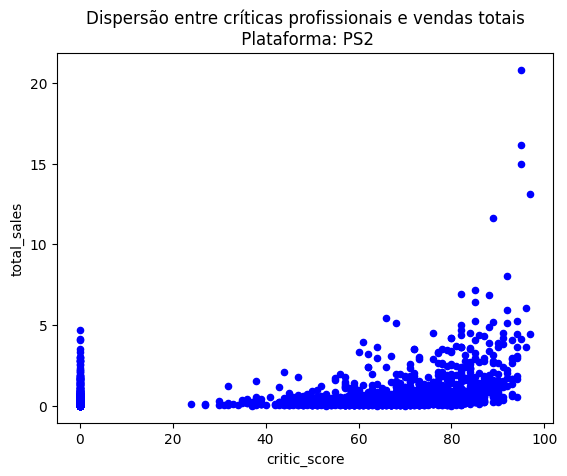

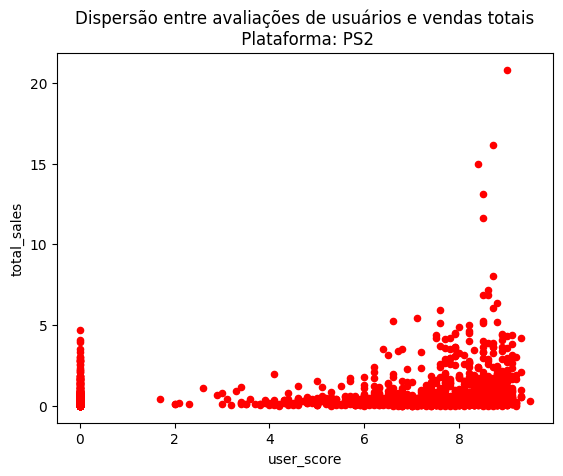

Coeficiente de correlação entre pontuação_do_usuário e vendas :0.26226568890845786
Coeficiente de correlação entre pontuação_crítica e vendas : 0.30072171894824934


In [29]:
# Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma (PS2)

correlacao_vendas_vs_criticos('PS2')

É importante observar que a correlação das pontuações tanto dos usuários quanto dos profissionais com relação às vendas é de 0,26 -0,30 respectivamente, portanto podemos concluir que essas avaliações não afetam significativamente as vendas das plataformas porque a correlação entre pontuações e curativos é baixo.

/tmp/ipykernel_97/3770906316.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[critico] = df_aux[critico].astype(float)
/tmp/ipykernel_97/3770906316.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[usuario] = df_aux[usuario].astype(float)


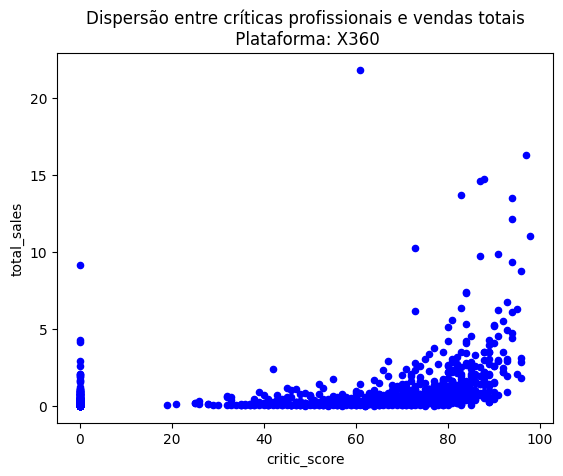

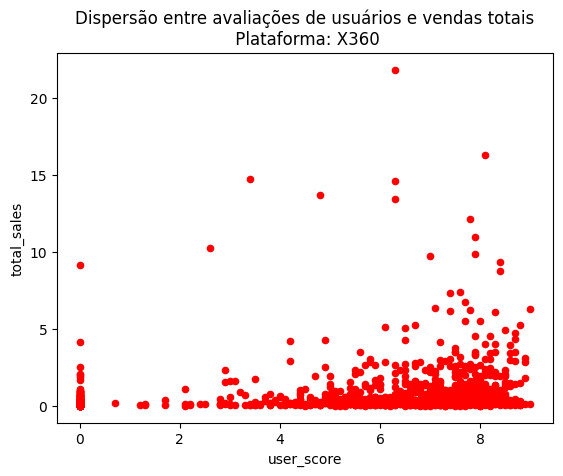

Coeficiente de correlação entre pontuação_do_usuário e vendas :0.2089000789435883
Coeficiente de correlação entre pontuação_crítica e vendas : 0.31179658742695177


In [30]:
# Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma (PS3)

correlacao_vendas_vs_criticos('X360')

/tmp/ipykernel_97/3770906316.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[critico] = df_aux[critico].astype(float)
/tmp/ipykernel_97/3770906316.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[usuario] = df_aux[usuario].astype(float)


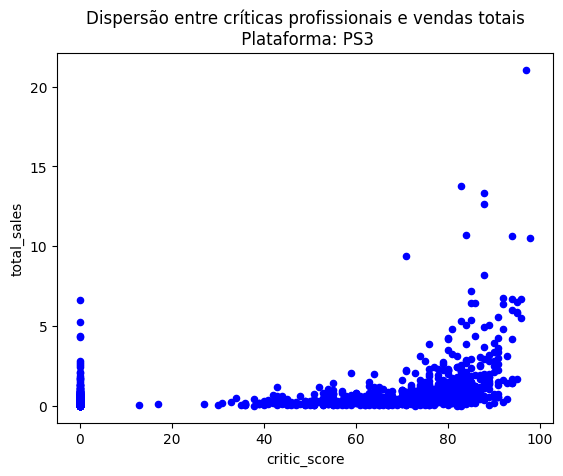

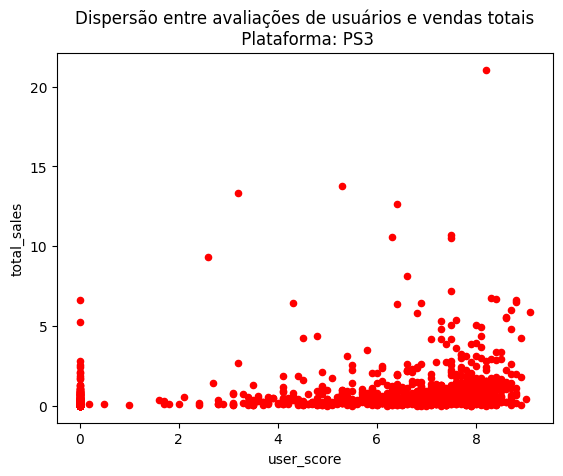

Coeficiente de correlação entre pontuação_do_usuário e vendas :0.27402545981226195
Coeficiente de correlação entre pontuação_crítica e vendas : 0.3550656759848728


In [31]:
# Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma (PS2)

correlacao_vendas_vs_criticos('PS3')

/tmp/ipykernel_97/3770906316.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[critico] = df_aux[critico].astype(float)
/tmp/ipykernel_97/3770906316.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[usuario] = df_aux[usuario].astype(float)


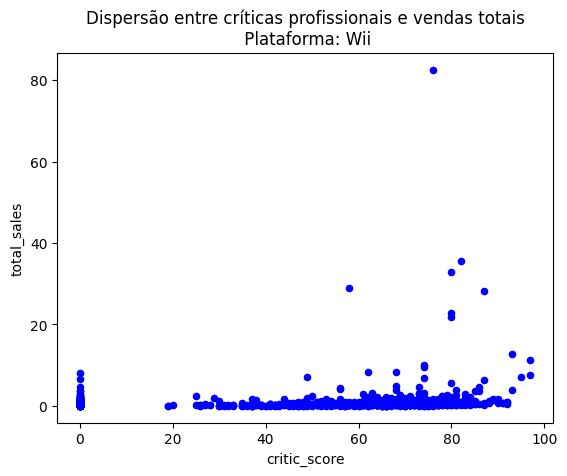

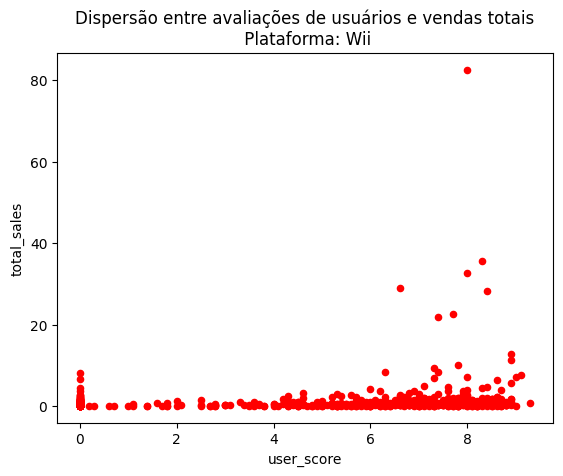

Coeficiente de correlação entre pontuação_do_usuário e vendas :0.18613675964673176
Coeficiente de correlação entre pontuação_crítica e vendas : 0.18949784397390257


In [32]:
# Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma (PS2)

correlacao_vendas_vs_criticos('Wii')


/tmp/ipykernel_97/3770906316.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[critico] = df_aux[critico].astype(float)
/tmp/ipykernel_97/3770906316.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux[usuario] = df_aux[usuario].astype(float)


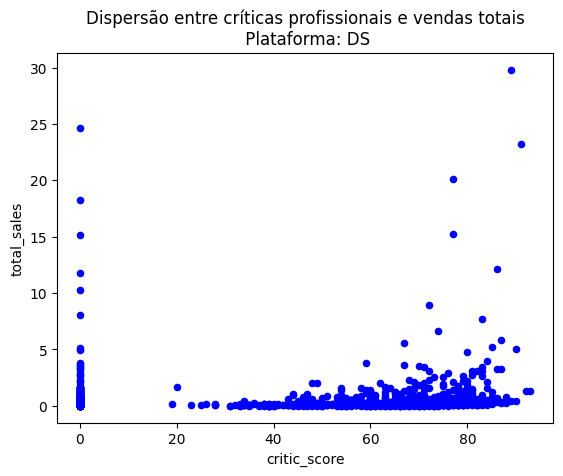

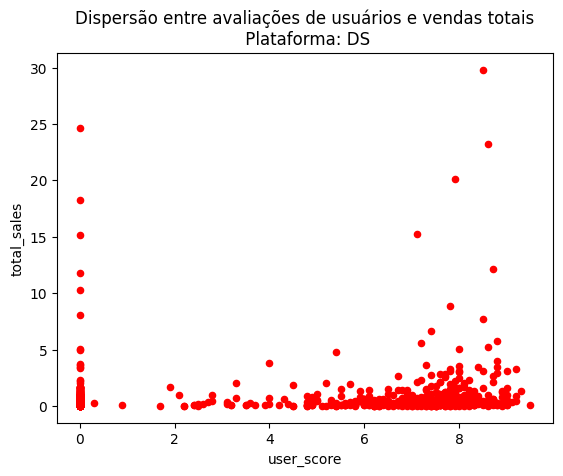

Coeficiente de correlação entre pontuação_do_usuário e vendas :0.18782955986290606
Coeficiente de correlação entre pontuação_crítica e vendas : 0.15908732465426645


In [33]:
# Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma (PS2)

correlacao_vendas_vs_criticos('DS')

Podemos perceber que nas plataformas com maiores vendas, a influência das críticas tem uma correlação muito baixa com as vendas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A dinâmica de correlação entre vendas e avaliações foi investigada com profundidade e conclusões foram apresentadas!
</div>


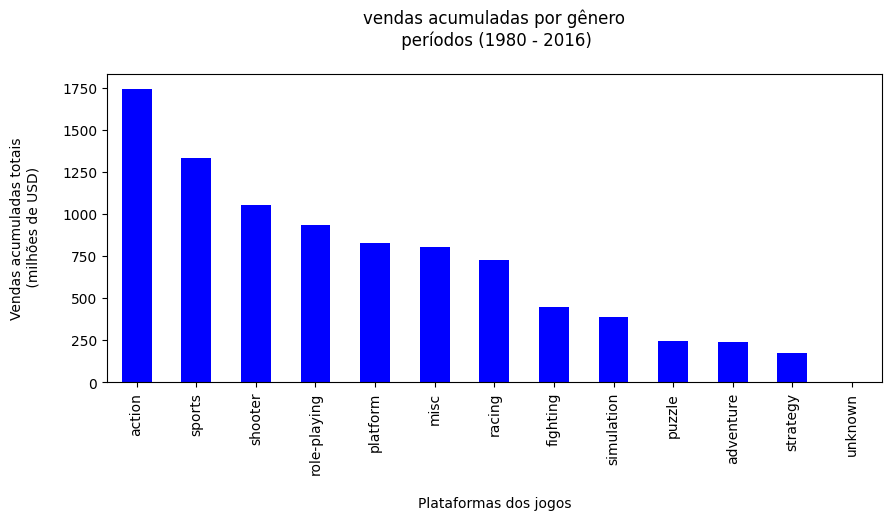

In [34]:
# gêneros mais lucrativos

genre_venda = df_game.groupby('genre').sum()['total_sales'].reset_index()
genre_venda = genre_venda.sort_values(by='total_sales', ascending=False)

lista = list(genre_venda['genre'])
genre_venda.index = lista

genre_venda['total_sales'].plot(kind='bar', color='blue', figsize=(10, 4))
plt.xticks(rotation=90)
plt.xlabel('\nPlataformas dos jogos')
plt.ylabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.title('vendas acumuladas por gênero\n períodos (1980 - 2016)\n')

plt.show()

Podemos perceber claramente que as categorias de ação e esporto são as mais vendidas e as menos vendidas são as estratégias, razão pela qual generalizar as vendas não é um tratamento correto dos dados que reflitam uma informação bem marcada e uma preferência bem definida por parte Usuários. .

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas por gênero foram endereçadas.
</div>


## Perfil de usuário para cada região

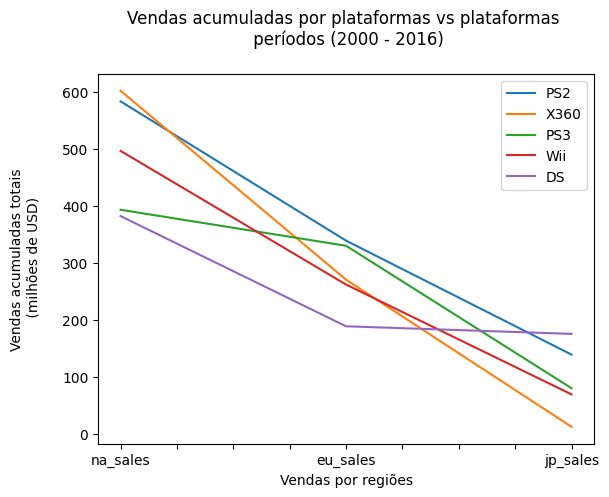

In [35]:
#As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

varia_plataf = df_game.groupby('platform').sum()[['na_sales','eu_sales','jp_sales','total_sales']]
varia_plataf = varia_plataf.sort_values(by='total_sales', ascending=False).head(5).reset_index()
varia_plataf = varia_plataf.drop('total_sales', axis=1)
varia_plataf = varia_plataf.set_index('platform')
varia_plataf.index.name = None

varia_plataf = trocar_colunas_linhas(varia_plataf)


varia_plataf.plot()
#plt.legend(coluna)
plt.ylabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.xlabel('Vendas por regiões')
plt.title('Vendas acumuladas por plataformas vs plataformas \n períodos (2000 - 2016)\n')
plt.show()

O comportamento das 5 principais plataformas tem o mesmo comportamento, as maiores quotas de mercado estão na América do Norte e as mais baixas no Japão como indica o gráfico.

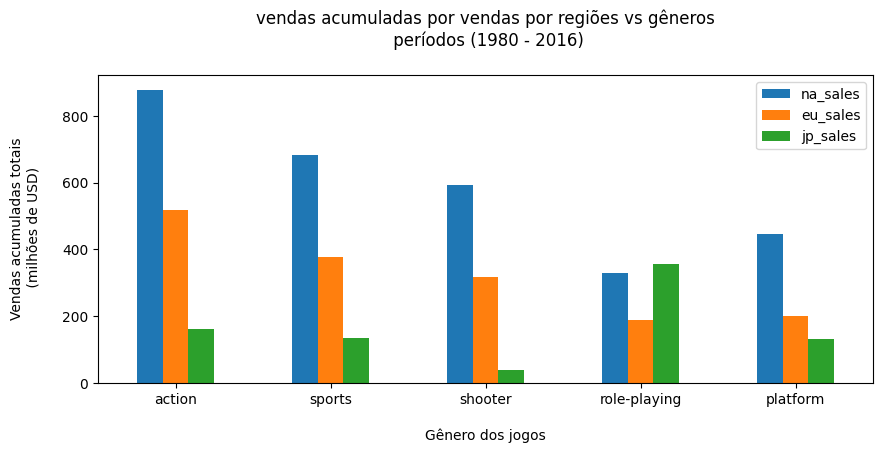

In [36]:
# Os cinco principais gêneros. Explique a diferença.

gener_principais = df_game.groupby('genre').sum()[['na_sales','eu_sales','jp_sales','total_sales']]
gener_principais = gener_principais.sort_values(by='total_sales', ascending=False).head(5)
gener_principais.index.name = None
gener_principais = gener_principais.drop(columns=['total_sales'])

gener_principais.plot(kind='bar', figsize=(10, 4))
plt.xticks(rotation=0)
plt.xlabel('\nGênero dos jogos')
plt.ylabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.title('vendas acumuladas por vendas por regiões vs gêneros\n períodos (1980 - 2016)\n')
plt.show()

As principais diferenças podem ser observadas no mercado japonês, onde houve uma diminuição nas vendas para o gênero ‘shooter’ e um aumento para o gênero ‘role-playing’. Outra diferença notável é que no mercado norte-americano há um aumento em vendas de 'plataform'

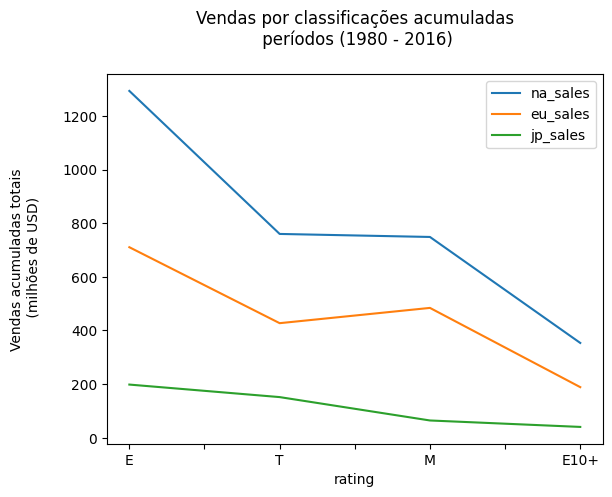

In [37]:
# As classificações do ESRB afetam as vendas em regiões individuais?

class_esrb = df_game.groupby('rating').sum()[['na_sales','eu_sales','jp_sales','total_sales']]
class_esrb = class_esrb.sort_values(by='total_sales', ascending=False).head(5).reset_index()
class_esrb = class_esrb.drop('total_sales', axis=1)
class_esrb = class_esrb.set_index('rating')
class_esrb.index.name = None

class_esrb = class_esrb.drop('unknown') # Removemos a linha de classificações desconhecidas

class_esrb.plot()
plt.ylabel('Vendas acumuladas totais\n (milhões de USD)\n')
plt.xlabel('rating')
plt.title('Vendas por classificações acumuladas\n períodos (1980 - 2016)\n')
plt.show()


In [38]:
# Calculos dos porcentagem das vendas por regiões.

class_esrb['%_na'] = class_esrb['na_sales']/class_esrb['na_sales'].sum()*100
class_esrb['%_eu'] = class_esrb['eu_sales']/class_esrb['eu_sales'].sum()*100
class_esrb['%_jp'] = class_esrb['jp_sales']/class_esrb['jp_sales'].sum()*100

class_esrb

,na_sales,eu_sales,jp_sales,%_na,%_eu,%_jp
E,1292.99,710.25,198.11,40.988226,39.245318,43.641370
T,759.75,427.03,151.40,24.084336,23.595816,33.351691
M,748.48,483.97,64.24,23.727073,26.742072,14.151338
E10+,353.32,188.52,40.20,11.200365,10.416793,8.855601


Podemos constatar que existe claramente uma tendência nas regiões para a compra de jogos com classificação E e T com uma percentagem a rondar os 70% entre as regiões, questão chave que deverá ser explorada em profundidade pelas equipas de marketing nas respetivas áreas de investigação de mercado, é importante determinar se a classificação realmente influencia na compra de jogos ou se é apenas um registro das preferências do usuário, fator que ajudaria a área de desenvolvimento de novos jogos.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

A dinâmica de vendas regionais por plataforma, gênero e classificação foram endereçadas!
</div>


## Análise de hipóteses

###  As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

**Dados gerais:** \
      1. hipóteses: classificações médias dos usuários das plataformas Xbox One e PC são as mesmas\
      2. Consideramos que $ σ^2 $ (população) = é desconhecido\
      3. Consideramos que as 2 variaveis são independentes\
      4. Consideramos que as varianças não são iguais\
      5. Consideramos um Nivel de Confiança do 95%\
      6. Consideramos ERRO = 5%, $\alpha$ = 0.05 (Nivel critico de significancia estatística)\
      7. Consideramos que o tamanho da amostra pelo teorema do limite central é grande o suficiente para aplicar um teste t.\
      8. Definimos que $ H_{o} = µ = µ_{o} $ (As classificações médias dos usuários das plataformas Xbox One = As classificações médias dos usuários das plataformas PC)\
      9. Definimos que $ H_{1} = µ ≠ µ_{o} $


**Premissa**: Em principio rejeitar a hipóteses nula: vai significar aceitar que as classicações médias dos usuarios são diferentes. Utilizamos o criterio para distribuções t-student por ser hipóteses sobre a igualdade das médias de duas populações


In [39]:
# Teste das hipóteses
# Ordenammos os dados, pelo parametro que precisamos classificações média por usuario para cada plataforma testada na hipótese

df_game['user_score'].mask(df_game['user_score'] =='unknown',0, inplace = True)
df_game['user_score'].mask(df_game['user_score'] =='tbd',0, inplace = True)
df_game['user_score'] = df_game['user_score'].astype(float)

XOne = df_game[(df_game['platform'] == 'XOne')&~(df_game['user_score']==0)]
PC = df_game[(df_game['platform'] == 'PC')&~(df_game['user_score']==0)]

vetor_XOne = list(XOne['user_score'])
vetor_PC = list(PC['user_score'])


In [40]:
media__variança_coluna(XOne,'user_score','PLATAFORMA XOne')
print('')
media__variança_coluna(PC,'user_score','PLATAFORMA PC')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS: PLATAFORMA XOne /////////////////////////////////////
 Meia estatística: 6.521428571428572
 Mediana estatística: 6.8 
 Variança estatística: 1.9069968429360695
 Desviação padrão: 1.380940564592144


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS: PLATAFORMA PC /////////////////////////////////////
 Meia estatística: 7.062467532467533
 Mediana estatística: 7.5 
 Variança estatística: 2.3407871413372066
 Desviação padrão: 1.5299631176395092


Vamos considerar que as pontuações do usuário para um jogo serão consideradas os valores médios desse jogo em todas as regiões, pois a fonte de dados está consolidada não podemos realizar o cálculo da média de cada jogo para calcular nosso vetor

In [41]:
# Em principio rejeitar a hipóteses nula: vai significar aceitar que as classificações médias dos usuarios para plataformas XOne e PC são diferentes.

vetor_XOne # Vetor de médias das classificações dos usuarios da plataforma XOne
vetor_PC # Vetor de médias das classificações dos usuarios da plataforma PC

alpha = 0.05
resultado = st.ttest_ind(vetor_XOne,vetor_PC, equal_var=False)
print("alpha = 0.05")
print(f"Pvalor = {resultado.pvalue}")
if resultado.pvalue < alpha:
    print("Rejeitamos a hipóteses nula: aceitamos que as classificações médias dos usuarios das plataformas XOne e PC são diferentes")
else:
    print("Não podemos rejeitar a hipóteses nula: que as receitas médias dos usuarios  das plataformas XOne e PC são diferentes")

alpha = 0.05
Pvalor = 4.935072360183574e-06
Rejeitamos a hipóteses nula: aceitamos que as classificações médias dos usuarios das plataformas XOne e PC são diferentes


###  As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes..

**Dados gerais:** \
      1. hipóteses: classificações médias dos usuários para os gêneros action e sport são diferentes\
      2. Consideramos que $ σ^2 $ (população) = é desconhecido\
      3. Consideramos que as 2 variaveis são independentes\
      4. Consideramos que as varianças não são iguais\
      5. Consideramos um Nivel de Confiança do 95%\
      6. Consideramos ERRO = 5%, $\alpha$ = 0.05 (Nivel critico de significancia estatística)\
      7. Consideramos que o tamanho da amostra pelo teorema do limite central é grande o suficiente para aplicar um teste t.\
      8. Definimos que $ H_{o} = µ = µ_{o} $ (As classificações médias dos usuários para os gêneros action = As classificações médias dos usuários para os gêneros sport)\
      9. Definimos que $ H_{1} = µ ≠ µ_{o} $


**Premissa**: Em principio rejeitar a hipóteses nula: vai significar aceitar que as classicações médias dos usuarios paras os gêneros indicados são diferentes. Utilizamos o criterio para distribuções t-student por ser hipóteses sobre a igualdade das médias de duas populações

In [42]:
# Teste das hipóteses
# Ordenammos os dados, pelo parametro que precisamos classificações média por usuario para cada gênero testada na hipótese

acao = df_game[(df_game['genre'] == 'action')&~(df_game['user_score']==0)]
esportes = df_game[(df_game['genre'] == 'sports')&~(df_game['user_score']==0)]

vetor_acao = list(acao['user_score'])
vetor_esporte = list(esportes['user_score'])

Vamos considerar que as pontuações do usuário para um jogo serão consideradas os valores médios desse jogo em todas as regiões, pois a fonte de dados está consolidada não podemos realizar o cálculo da média de cada jogo para calcular nosso vetor.

In [43]:
media__variança_coluna(acao,'user_score','GÊNERO ACTION')
print('')
media__variança_coluna(esportes,'user_score','GÊNERO SPORT')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS: GÊNERO ACTION /////////////////////////////////////
 Meia estatística: 7.054043715846995
 Mediana estatística: 7.4 
 Variança estatística: 2.031746898033205
 Desviação padrão: 1.4253935940761082


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS: GÊNERO SPORT /////////////////////////////////////
 Meia estatística: 6.961196736174069
 Mediana estatística: 7.4 
 Variança estatística: 2.5965147189730033
 Desviação padrão: 1.611370447467932


In [44]:
# Em principio rejeitar a hipóteses nula: vai significar aceitar que as classificações médias dos usuarios para os gêneros action e sport são diferentes.

vetor_acao  # Vetor de médias das classificações dos usuarios para gênero ação
vetor_esporte # Vetor de médias das classificações dos usuarios para gênero esporte

alpha = 0.05
resultado = st.ttest_ind(vetor_acao,vetor_esporte, equal_var=False)
print("alpha = 0.05")
print(f"Pvalor = {resultado.pvalue}")
if resultado.pvalue < alpha:
    print("Rejeitamos a hipóteses nula: aceitamos que as classificações médias dos usuarios para os gêneros ação e esportes são diferentes")
else:
    print("Não podemos rejeitar a hipóteses nula: que as classificações médias dos usuarios para os gêneros ação e esportes são iguais")

alpha = 0.05
Pvalor = 0.11483818791498286
Não podemos rejeitar a hipóteses nula: que as classificações médias dos usuarios para os gêneros ação e esportes são iguais


Podemos observar como conclusão que a hipótese nula não pode ser rejeitada, não podemos rejeitar as classificações médias para os gêneros indicados, o que podemos determinar nas variáveis ​​da estatística descritiva o que indica uma similaridade ajustada, portanto não pode ser rejeitada.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
    
Gostaria apenas que exibisse o p-valor obtido para termos clareza total do resultado do teste
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Correto, concordo que esta opção é mais visual e convincente dos resultados obtidos e apoia as análises resultantes.

</div>

## Concluções

Como já sabemos, estamos a trabalhar para a loja online ICE e precisamos de estar a trabalhar com informação histórica de 1980 a 2016 com a tarefa de planear a campanha publicitária para 2017, após as análises efectuadas e as descrições dos dados em conjunto com as técnicas que até agora aplicamos não temos técnicas específicas para projetar mas olhando os dados que podemos estimar, por exemplo vimos que o ciclo de vida de uma plataforma é de aproximadamente 10 anos com vendas maiores no meio de sua período e com uma diminuição nos próximos 5 anos.

Esta informação permite-nos recomendar que para 2017 os jogos de plataforma com as gamas especificadas desde o seu lançamento sejam tomados como referência prioritária para garantir que as vendas possam aumentar de acordo com o que se tem observado no comportamento dos clientes nos anos anteriores.

A empresa deve levar em consideração o que os dados refletem no que diz respeito à preferência dos clientes quanto aos gêneros e classificações dos jogos para enfatizar os mais vendidos e reforçar aqueles com menos demandas com estratégias inovadoras.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Uma conclusão para o experimento foi apresentada.
</div>
